## BoostCard

Boosting scorecards with constraints for end-to-end model building with the push of a button(s).

### Training a BoostCard

To demonstrate how to train a boostcard we will work with a dataset of titanic survivors.

In [1]:
import pandas as pd

df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


### Defining Constraints

Constraints are collections of value selections and an enforced relationship with the outcome variable. There are four kinds of value selections that can be used to build up feature constraints:

1. Interval - An interval selection defines a lower and upper bound as well as whether the left and right bonds are open or closed. The interval selection is the only one that can have a monotonic relationship.
2. Override - Override selections indicate a sentinel value
3. Missing - Missing selections only define the `np.nan` value
4. Identity - This is a catch-all selection that enforces no relationship and can be used when a variable is un-constrained.

### Constraints for Titanic

For the titanic dataset, we will create constraints for the Age and Fare variables. The requirements for these constraints are usually derived from regulatory or repuational risk requirements.

In [2]:
from pyboostcard.boostcard import BoostCardClassifier
from pyboostcard.constraints import *
from pyboostcard.selections import *

c_age = Constraint(
    Missing(order=4),
    Override(override=24.0, order=0),
    Interval((0, 30), (True, True), 2, mono=-1),
    Interval((30, 100), (False, True), 1, mono=0), name='Age')

c_fare = Constraint(
    Interval((0, 50), (True, True), 1, mono=1),
    Interval((50, np.inf), (False, True), 2, mono=1), name='Fare')

### BoostCard

There are two classes for boostcard modeling: `BoostCardClassifier` and `BoostCardRegressor`. The former is used for classification tasks usually associated with a binary outcome. The latter is used for continuous outcomes. The titanic dataset has an outcome variable indicating survival as 0/1. Therefore we will be using a `BoostCardClassifier` for this example:

In [3]:
%%capture
clf = BoostCardClassifier([c_age, c_fare], min_child_weight=25)
clf.fit(df, df['Survived'])

In [4]:
yhat = clf.decision_function(df, columns=True)

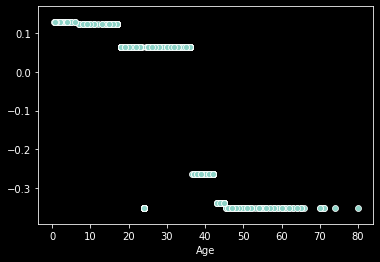

In [5]:
import seaborn as sns
sns.scatterplot(x=df['Age'], y=yhat[:,0])